I take a dataset from kaggle which contains a the factors involved in campus placement. 

In [ ]:
#Loading the Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Data
dataframe = pd.read_csv('campus_recruitment.csv') 

In [4]:
# Have a Glance on the Data
dataframe.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
# Understanding the Data
dataframe.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [118]:
dataframe['salary'].fillna(method='ffill', inplace=True)

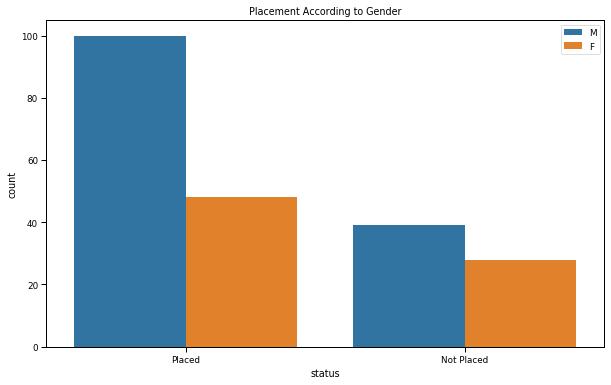

In [135]:
plt.figure(figsize=(10,6))
sns.countplot(x ='status' ,hue='gender', data=dataframe)
plt.title('Placement According to Gender')
plt.legend()
plt.savefig('placementgender.png')

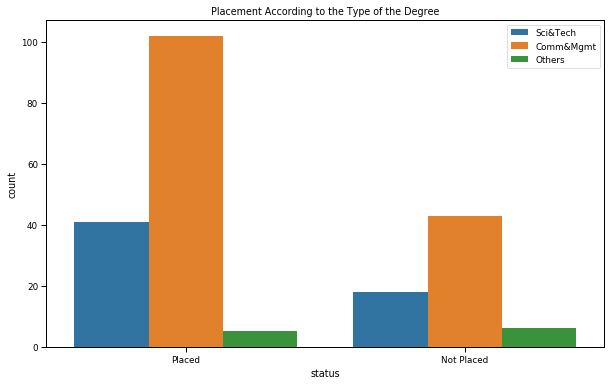

In [136]:
plt.figure(figsize=(10,6))
sns.countplot(x ='status' ,hue='degree_t', data=dataframe)
plt.title('Placement According to the Type of the Degree')
plt.legend()
plt.savefig('placedegree.png')

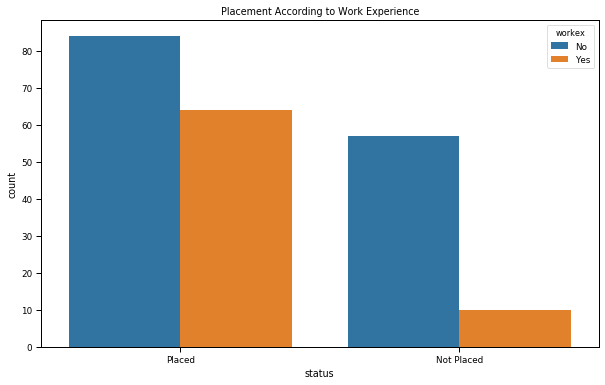

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(x ='status' ,hue='workex', data=dataframe)
plt.title('Placement According to Work Experience')
plt.savefig('placeexperience.png')

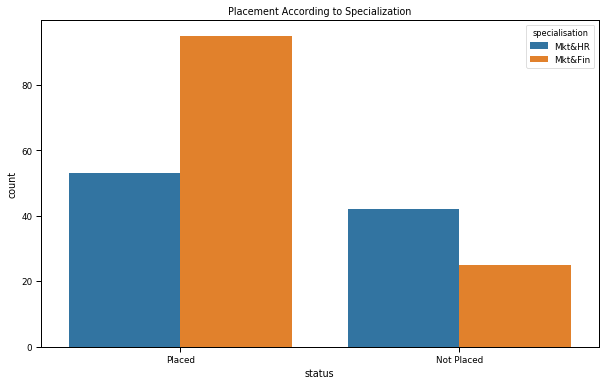

In [138]:
plt.figure(figsize=(10,6))
sns.countplot(x ='status' ,hue='specialisation', data=dataframe)
plt.title('Placement According to Specialization')
plt.savefig('placespecialization.png')

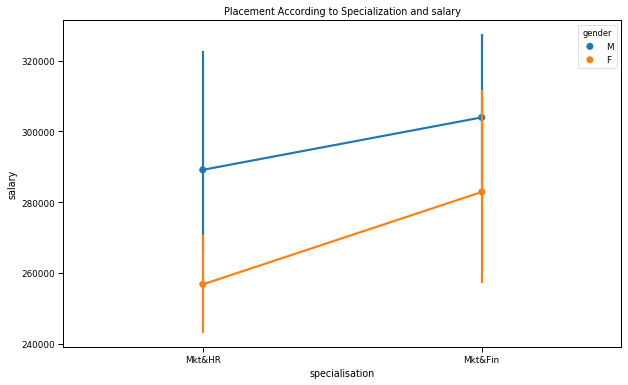

In [142]:
plt.figure(figsize=(10,6))
sns.pointplot(x ='specialisation', y='salary', hue='gender',  data=dataframe)
plt.title('Placement According to Specialization and salary')

plt.savefig('placesalaryvsspecialization.png')

Text(0.5, 1.0, 'Placement According to Specialization')

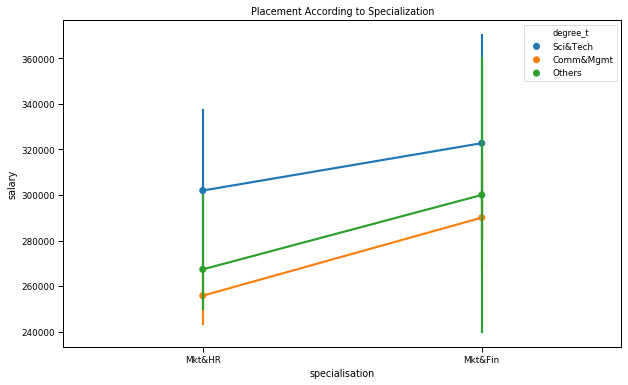

In [30]:
plt.figure(figsize=(10,6))
sns.pointplot(x ='specialisation', y='salary' ,hue='degree_t', data=dataframe)
plt.title('Placement According to Specialization')


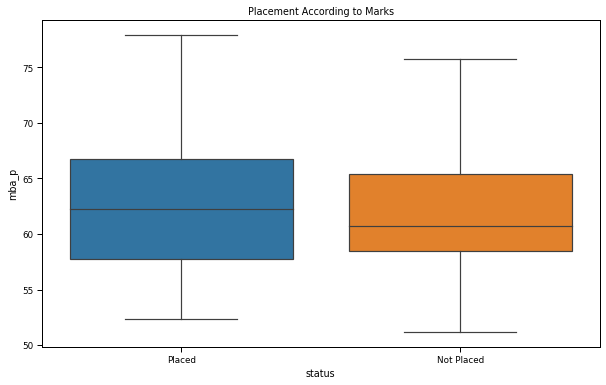

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(x ='status', y='mba_p' , data=dataframe)
plt.title('Placement According to Marks')
plt.savefig('placemarks.png')

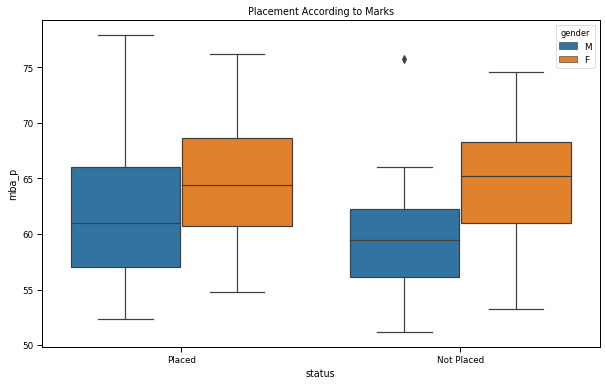

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(x ='status', y='mba_p' ,hue='gender', data=dataframe)
plt.title('Placement According to Marks')
plt.savefig('placementmarksgender.png')

In [125]:
data = pd.get_dummies(dataframe, columns = ['gender','hsc_b', 'ssc_b', 'hsc_s','degree_t', 'workex', 'specialisation'], drop_first=True)

In [126]:
y_status = data['status']
y_salary = data['salary']
X = data.drop(labels=['sl_no','status','salary'], axis=1)

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_status = encoder.fit_transform(y_status)
print(y_status)

[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]


In [63]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier as DTC
estimator = DTC()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(X, y_status)

feature_names = X.columns
selected_features = feature_names[selector.support_].tolist()
X = X[selected_features]


In [134]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y_status, test_size=0.2)
classifier = DTC()
classifier.fit(X_train, y_train)

feature_importance = classifier.feature_importances_

plt.figure(figsize=(10,8))
sns.barplot(x=feature_names, y=feature_importance)

ValueError: Grouper and axis must be same length

<Figure size 720x576 with 0 Axes>

Accuracy of LR: 0.8960784313725491
Accuracy of KNN: 0.8852941176470587
Accuracy of DT: 0.8032679738562092
Accuracy of NB: 0.85
Accuracy of SVC: 0.8846405228758171
Accuracy of RFC: 0.8673202614379086


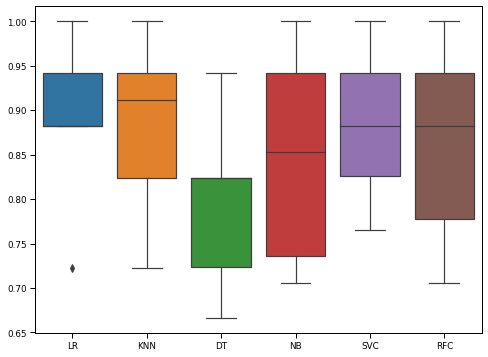

In [90]:
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
models, names = [],[]

models.append(LogisticRegression()) 
names.append('LR') 
models.append(KNeighborsClassifier()) 
names.append('KNN') 
models.append( DecisionTreeClassifier()) 
names.append('DT') 
models.append(GaussianNB()) 
names.append('NB') 
models.append(SVC(gamma='auto')) 
names.append('SVC') 
models.append(RandomForestClassifier()) 
names.append('RFC') 



results = []

for model, name in zip(models, names) :
	result = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
	results.append(result)
    
for result, name in zip(results, names):
	print("Accuracy of {}: {}".format(name, result.mean()))
    

plt.figure(figsize=(8,6))
sns.boxplot(x=names, y=results)

In [91]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print('Accuracy :       ', accuracy_score(y_test, y_pred))
print('F-Measure :      ', f1_score(y_test, y_pred, average = 'weighted'))
print('ROC Score :      ', roc_auc_score(y_test, y_pred))

Accuracy :        0.7906976744186046
F-Measure :       0.784391013007489
ROC Score :       0.7464285714285714
